In [6]:
import numpy as np
import pandas as pd

import seaborn as zzz
import matplotlib.pyplot as plt


In [7]:
frame = pd.read_csv("C:/Users/12036/Downloads/Wine.csv",header = None, usecols = [0,1,2])
frame.columns = ['Class Label', 'Alchohol', 'Malic Acid']

frame


,Class Label,Alchohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<AxesSubplot:xlabel='Alchohol', ylabel='Density'>

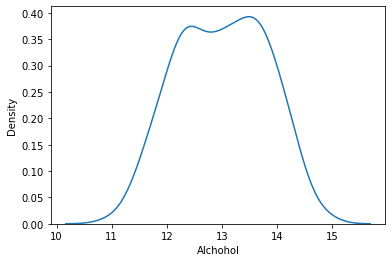

In [8]:
zzz.kdeplot(frame['Alchohol'])


<AxesSubplot:xlabel='Malic Acid', ylabel='Density'>

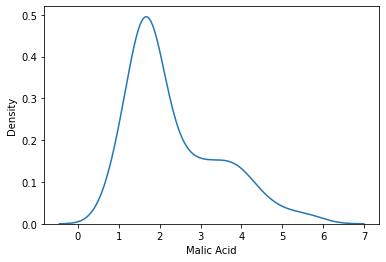

In [9]:
zzz.kdeplot(frame['Malic Acid'])

C:\Users\12036\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alchohol', ylabel='Malic Acid'>

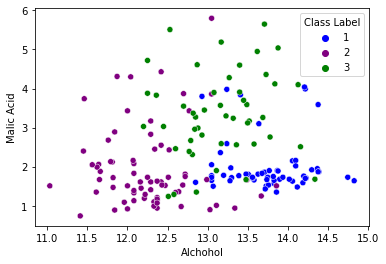

In [14]:
c_d = {1:'blue', 2:'purple', 3:'green'}

zzz.scatterplot(frame['Alchohol'], frame['Malic Acid'],hue =frame['Class Label'], palette = c_d)

In [16]:
from sklearn.model_selection import train_test_split

A_train, A_test, B_train, B_test = train_test_split(frame.drop('Class Label', axis = 1), 
                                                    frame['Class Label'], test_size = 0.2, random_state = 0)


A_train.shape, A_test.shape


((142, 2), (36, 2))

In [18]:
from sklearn.preprocessing import MinMaxScaler

s = MinMaxScaler()

s.fit(A_train)

A_train_s = s.transform(A_train)
A_test_s = s.transform(A_test)



A_train_s = pd.DataFrame(A_train_s, columns = A_train.columns)
A_test_s = pd.DataFrame(A_test_s, columns = A_test.columns)



In [19]:
np.round(A_train.describe(), 1)

,Alchohol,Malic Acid
count,142.0,142.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.7
25%,12.3,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [20]:
np.round(A_train_s.describe(), 1)

,Alchohol,Malic Acid
count,142.0,142.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


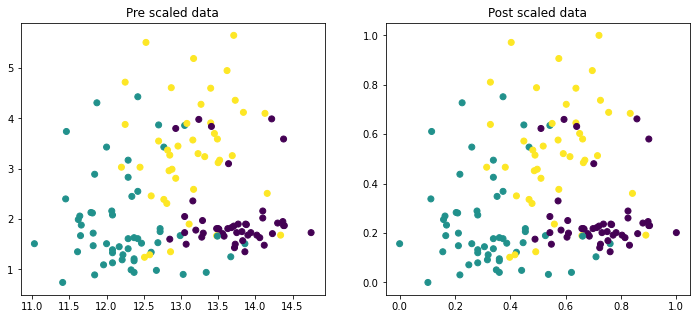

In [22]:
############## PLOTS ###############

fig, (a1, a2) = plt.subplots(ncols = 2, figsize = (12, 5))

a1.scatter(A_train['Alchohol'], A_train['Malic Acid'], c = B_train)
a1.set_title("Pre scaled data")

a2.scatter(A_train_s['Alchohol'], A_train_s['Malic Acid'], c = B_train)
a2.set_title("Post scaled data")

plt.show()

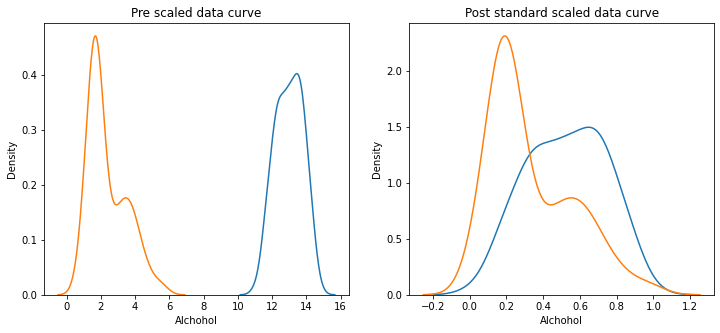

In [24]:
fig, (a1, a2) = plt.subplots(ncols = 2, figsize = (12, 5))


a1.set_title("Pre scaled data curve")
zzz.kdeplot(A_train['Alchohol'], ax = a1)
zzz.kdeplot(A_train['Malic Acid'], ax = a1)

a2.set_title("Post standard scaled data curve")
zzz.kdeplot(A_train_s['Alchohol'], ax = a2)
zzz.kdeplot(A_train_s['Malic Acid'], ax = a2)


plt.show()